# Estudi del *data set* hotel_review

## Objectiu

En aquest quadern estudirem una a una i en conjunt
les variables del *data set* de la pràctica entregable 
`hotel_review_analysis`
de l'assignatura `Aprenentage Automàtic`
del Dr. Juan Huguet. 

L'objectiu d'aquest estudi és determinar quines noves característiques 
podem extreure o completar des de fonts externes 
per tal de millorar l'*accuracy* del model 
que es preten implementar i 
d'aquesta forma poder subministrar a la cadena hotelera 
que ens ha contractat 
una resposta amb més fonament.

La resposta que s'espera són un conjunt de 
consells que li permetin elevar l'opinió dels clients.

## Carregam les dades

Procedim a carregar els registres dins un *data frame* per tal de poder fer-hi 
feina de forma còmoda.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_file_list = [
    'data/hotel_reviews_dataset_part_1.csv',
    'data/hotel_reviews_dataset_part_2.csv', 
    'data/hotel_reviews_dataset_part_3.csv',
    'data/hotel_reviews_dataset_part_4.csv']

df = pd.DataFrame()

for file in data_file_list:
    print(f"Loading {file}")
    df = pd.concat([df, pd.read_csv(file)], ignore_index = True)

Loading data/hotel_reviews_dataset_part_1.csv
Loading data/hotel_reviews_dataset_part_2.csv
Loading data/hotel_reviews_dataset_part_3.csv
Loading data/hotel_reviews_dataset_part_4.csv


Inspeccionam ...

In [3]:
df.head(4)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968


In [4]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Ens crida l'atenció que la latitud i la longitud tenguin un recorregut tan petit. 
Sembla com si tots els hotels que la tenen informada, siguin de la mateixa regió. 
Alguns valors (de latitud i longitud) no estan informats.

La variable `days_since_review` no és numèrica (!). 
S'haurà d'analitzar el seu contingut per veure si pot ser 
transformada a numèrica (entera).

### Valoració de l'impacte dels valors *nan*

Miram si tenim valors *nan* a qualque columna ...

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Com ja havíem detectat, 
confirmam que **hi ha valors nuls** 
a les coordenades geogràfiques d'alguns registres.
Ho haurem de tenir en compte si interessàs classificar els hotels en categories
que depenguin de la seva ubicació i la inferim de les coordenades geogràfiques.

## Estudi de les variables predictores

### Llibreries addicionals

Per poder estudiar millor les variables que tenim 
necessitarem (instal·lar): 

In [6]:
# !conda install geopandas
## !pip install geopandas

#
# Aquesta llibreria amplia pandas amb eines que permeten tractaments geogràfics
#
import geopandas as gpd

### Variables que depenen de l'establiment

Al conjunt de dades subministrat hi ha variables que depenen de l'establiment hoteler i 
d'altres que són pròpiament de la revisió que ha fet el client.

Per tal de tenir una millor visió de les variables relacionades
amb l'establiment hoteler, 
les agruparem en un *data frame*:

In [7]:
hotel_columns = [
    'Hotel_Address',
    'Additional_Number_of_Scoring',
    'Average_Score',
    'Hotel_Name',
    'Total_Number_of_Reviews',
    'lat',
    'lng']

#
# Hem de dir-li a pandas que també volem els nuls perquè lat i lng en tenen
#
df_hotel = df[hotel_columns].groupby(hotel_columns, dropna = False).first().reset_index()

In [8]:
df_hotel

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Total_Number_of_Reviews,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,1403,52.360576,4.915968
1,1 15 Templeton Place Earl s Court Kensington a...,244,8.5,K K Hotel George,1831,51.491888,-0.194971
2,1 2 Serjeant s Inn Fleet Street City of London...,639,9.2,Apex Temple Court Hotel,2619,51.513734,-0.108751
3,1 3 Queens Garden Westminster Borough London W...,1058,7.7,The Park Grand London Paddington,4380,51.514218,-0.180903
4,1 3 Rue d Argentine 16th arr 75116 Paris France,26,8.4,Monhotel Lounge SPA,171,48.874348,2.289733
...,...,...,...,...,...,...,...
1489,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,260,8.0,Suite Hotel 900 m zur Oper,3461,48.193523,16.366915
1490,Wildpretmarkt 5 01 Innere Stadt 1010 Vienna Au...,82,8.9,Hotel Amadeus,717,48.210447,16.371578
1491,Wilton Place Knightsbridge Westminster Borough...,70,9.1,The Berkeley,232,51.502091,-0.157779
1492,Wrights Lane Kensington and Chelsea London W8 ...,1172,7.8,Holiday Inn London Kensington,5945,51.499981,-0.192879


Pel que sembla hi ha 1494 establiments.

A continuació farem un petit estudi del significat 
de cada variable i de les propietats que 
pensam que poden ésser útils per a l'[objectiu](#Objectiu)
del client.

#### Hotel_Address

És un camp de texte lliure que conté l'adreça de l'Hotel. 
El nom del païs sembla estar sempre al final del camp.

Segurament seria possible inferir les seves coordeandes geogràfiques 
a partir de l'adreça per tal de poder-li donar una puntuació 
segons la distància al centre del nucli de població o a monuments 
singulars. 
De totes formes, com que a la gran majoria dels establiments 
ja tenim les coordenades geogràfiques als camps `lat`i `lng`, 
en principi de l'adreça només 
**sembla d'interès l'extracció del nom del país**.

El país de l'establiment pot tenir interès a l'hora de confrontar 
les espectatives dels clients amb les ressenyes que han fet.

Feim unes proves per veure si es possible extreure el nom del país de forma fiable:

In [9]:
#
# El ds *naturalearth_lowres* té una representació de la terra per països
#
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
#
# També conté una columna (name) amb el nom de cada país
#
country_list = world['name']

Vegem si és fàcil treure'n el nom del païs.

In [11]:
country = []
for address in df_hotel['Hotel_Address']:
    country_name = None
    i = 0
    while (country_name == None) and (i < len(country_list)):
        if address.endswith(country_list[i]):
            country_name = country_list[i]
        i += 1
    country.append(country_name)
df_hotel['Hotel_Country'] = country

In [12]:
df_hotel[['Hotel_Address', 'Hotel_Country']].head(5)

,Hotel_Address,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands
1,1 15 Templeton Place Earl s Court Kensington a...,United Kingdom
2,1 2 Serjeant s Inn Fleet Street City of London...,United Kingdom
3,1 3 Queens Garden Westminster Borough London W...,United Kingdom
4,1 3 Rue d Argentine 16th arr 75116 Paris France,France


In [13]:
df_hotel['Hotel_Country'].unique()

array(['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy',
       'Austria'], dtype=object)

Sembla que en el conjunt de dades tan sols tenim 6 països.

Per tant una **codificació del tipus *OHE* per la nova columna país** 
podria ser l'apropiada.

#### Additional_Number_of_Scoring

És un camp numèric enter. 
Sembla contenir el número de puntuacions addicionals que no 
estan contingudes al conjunt de dades subministrat.

In [14]:
df_hotel['Additional_Number_of_Scoring'].describe()

count    1494.000000
mean      190.715529
std       245.254967
min         1.000000
25%        53.000000
50%       106.000000
75%       231.000000
max      2682.000000
Name: Additional_Number_of_Scoring, dtype: float64

#### Average_Score

Un camp amb un número decimal. 
Sembla ser la puntuació entre 0 i 10 que té l'establiment.
El valor més petit en el conjunt subministrat és 5.2

In [15]:
df_hotel['Average_Score'].describe()

count    1494.000000
mean        8.467135
std         0.548050
min         5.200000
25%         8.100000
50%         8.500000
75%         8.900000
max         9.800000
Name: Average_Score, dtype: float64

#### Hotel_Name

És el nom de l'Hotel.

In [16]:
df_hotel['Hotel_Name'].describe()

count             1494
unique            1492
top       Hotel Regina
freq                 3
Name: Hotel_Name, dtype: object

Sembla que tenim un dels noms dels hotels, repetit. 
Vegem si és a diferents ciutats ...

In [17]:
df_hotel[df_hotel['Hotel_Name'] == 'Hotel Regina'][['Hotel_Name', 'Hotel_Country']]

,Hotel_Name,Hotel_Country
851,Hotel Regina,Spain
1251,Hotel Regina,Austria
1336,Hotel Regina,Italy


A l'hora de separar els hotels per a entrenament i prova, 
s'haurà de tenir en compte que el nom de l'establiment hoteler no és 
clau única, i **fer servir una dupla** 
que ho garanteixi com podria ser 
**(`Hotel_Name`, `Hotel_Country`)**.

#### Total_Number_of_Reviews

És un camp numèric amb el número d'opinions que en total s'han fet de l'establiment hoteler.

In [18]:
df_hotel['Total_Number_of_Reviews'].describe()

count     1494.000000
mean      1297.222222
std       1371.420726
min         43.000000
25%        422.000000
50%        867.000000
75%       1670.250000
max      16670.000000
Name: Total_Number_of_Reviews, dtype: float64

In [19]:
print(df_hotel['Total_Number_of_Reviews'].sum())
print(len(df))

1938050
515738


La suma del camp és molt superior al número de registres del conjunt de dades, 
així que podem presumir que existeixen opinions que no tenim al nostre conjunt.

#### Coordenades espaials (lat, lng)

##### Representació dins un pla cartessià simple

Per tal de veure gràficament on són els hotels es representa la seva ubicació com a punts en un pla.

In [20]:
#
# Necessitam dibuixar
#

import matplotlib.pyplot as plt

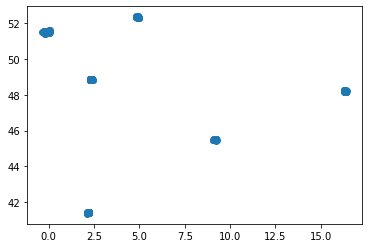

In [21]:
# dibuixarem només un pic cada punt
dfgeol = df_hotel[['lng', 'lat']].dropna()

plt.scatter(x = dfgeol['lng'], y = dfgeol['lat'])
plt.show()

In [22]:
dfgeol.shape

(1477, 2)

Surten menys hotels que els del *df*. 
Això ens confirma el que ja havíem vist, 
que hi ha alguns hotels sense coordenades 
geogràfiques informades. 
Anem a veure quins són:

In [23]:
df_hotel[df_hotel['lat'].isna()]

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Total_Number_of_Reviews,lat,lng,Hotel_Country
279,20 Rue De La Ga t 14th arr 75014 Paris France,22,7.8,Mercure Paris Gare Montparnasse,377,NaN,NaN,France
331,23 Rue Damr mont 18th arr 75018 Paris France,21,8.3,Holiday Inn Paris Montmartre,298,NaN,NaN,France
516,4 rue de la P pini re 8th arr 75008 Paris France,172,8.8,Maison Albar Hotel Paris Op ra Diamond,1524,NaN,NaN,France
840,Bail n 4 6 Eixample 08010 Barcelona Spain,96,8.9,NH Collection Barcelona Podium,883,NaN,NaN,Spain
957,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...,44,8.0,City Hotel Deutschmeister,675,NaN,NaN,Austria
987,Hasenauerstra e 12 19 D bling 1190 Vienna Austria,37,8.6,Hotel Park Villa,564,NaN,NaN,Austria
1022,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,333,8.3,Fleming s Selection Hotel Wien City,3672,NaN,NaN,Austria
1023,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,39,8.4,Cordial Theaterhotel Wien,422,NaN,NaN,Austria
1053,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,101,8.5,Hotel Daniel Vienna,1405,NaN,NaN,Austria
1137,Paragonstra e 1 11 Simmering 1110 Vienna Austria,36,8.1,Roomz Vienna,568,NaN,NaN,Austria


Com que sembla que el número d'hotel sense geo-referenciar 
és un percentatge petit i 
a més encara no sabem si les coordenades poden ser importants, 
de moment decidim no establir cap criteri o mètode per a 
assignar-lis un valor en el moment del seu processat 
dins el *pipeline*.

##### Representació dins un mapamundi

Del la representació al pla cartesià anterior, 
podem albirar que les 1472 duples de coordenades 
estan molt concentrades a 6 localitzacions.

Anem a dibuixar-les damunt un mapamundi per veure on són.

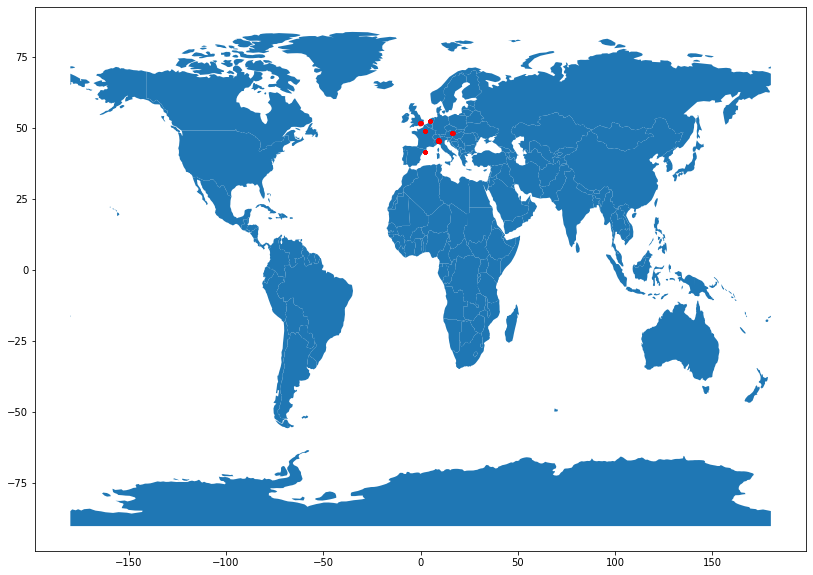

In [24]:
# la projecció EPSG:4326 és en coordenades geogràfiques (longitud, latitud)
gdf = gpd.GeoSeries(data = gpd.points_from_xy(dfgeol['lng'], dfgeol['lat']), 
                    crs = "EPSG:4326")

gdf.plot(ax = world.plot(figsize = (15, 10)), 
         marker = 'o', 
         color = 'red',
         alpha = 0.2,
         markersize = 10);

Sembla que els hotels que tenen les coordenades informades 
s'ubiquen als 6 països d'Europa que ja hem inferit de les adreces ...

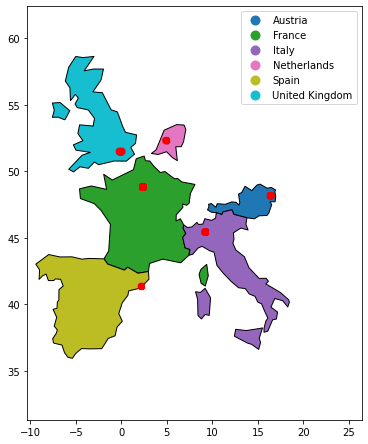

In [25]:
# Països
country_list = df_hotel['Hotel_Country'].unique()

ax = world.loc[world['name'].isin(country_list), : ].plot(
    figsize = (6, 10),
    edgecolor = 'black',
    column = 'name', 
    legend = True
)

ax.set_xlim(left = dfgeol['lng'].min() - 10, right = dfgeol['lng'].max() + 10)
ax.set_ylim(bottom = dfgeol['lat'].min() - 10, top = dfgeol['lat'].max() + 10)

gdf.plot(ax = ax,
         color = 'red', 
         alpha = 0.1)

plt.show()

En concret sembla que a prop o dins d'una sola ciutat (turística) per a cada païs. 

Inicialment se pensava que podria ser d'interès crear una nova característica que fos 
l'`hemisferi` per tal de poder modelar quins són els mesos de l'any en que fa més calor per exemple. 
Però com que només estan situats dins l'hemisferi nord, no té sentit crear-la, 
al manco per aquest conjunt de dades. 

El que sí se podria intentar seria calcular la seva distància al mar, 
perquè combinada amb la latitud i el mes de l'any pot donar una idea del clima en aquell mes i
pot ser el clima o el mes tengui relació amb les opinions.

##### Distància a la mar

Per calcular la distància fins a la mar, 
serà necessari obtenir un polígon del perfil dels continents.

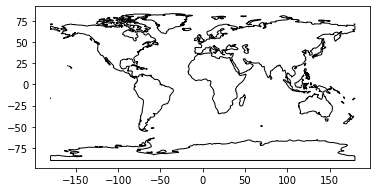

In [26]:
from shapely.ops import cascaded_union

# Obtenim les formes de tots els polígons
polygons = gpd.GeoSeries(world['geometry'])

# Els unim per a formar la línia de la costa
boundary = gpd.GeoSeries(cascaded_union(polygons))

# Vegem que tal ha quedat ...
boundary.plot(color = 'none')
plt.show()

Amb aquest perfil de la zona terrestre, 
podrem calcular la distància al llindar del polígon 
(que serà la distància fins a la mar).

In [27]:
# Ens asseguram de que el sistema de projecció sigui el mateix ...
boundary.crs = gdf.crs

# I projectam ambdós ens geomètrics a metres
boundarym = boundary.to_crs(crs = "EPSG:3857")

gdfm = gdf.to_crs(crs = "EPSG:3857")

In [28]:
# Calculam les distàncies
dist = []
for location in gdfm:
    dist.append(int(boundarym.boundary.distance(location)))

dist = pd.Series(dist)

In [29]:
# I miram que tal ha anat ... 

dist.describe()

count      1477.000000
mean     186234.869330
std      131241.250614
min        7880.000000
25%      128246.000000
50%      174878.000000
75%      242415.000000
max      514008.000000
dtype: float64

Vaja, ... la distància mínima que ens surt, són quasi 8 km !

Comprovarem si és cert ...

In [30]:
print(gdf[dist[dist == dist.min()].index])

1180    POINT (2.19015 41.36844)
dtype: geometry


Segons *Google Maps*, 
aquestes coordenades estan a la vorera de mar, 
així que sembla que el càlcul que feim **no funciona** prou bé. 

:-(

[Localitzar a Google Maps](https://www.google.com/maps/search/41.36844+2.19015)

![Image](img/google_maps_1.png)

Un hotel que està al moll, segons els càlculs resulta estar ubicat 
quasi a 8 km de la mar. :-(

Probablement la resolució del polígon que feim servir no sigui prou gran 
com per a poder fer un càlcul precís. 
Per tant prescindirem de la classificació de l'establiment que 
podriem fer si sapiguessim la seva distància a la mar 
(establiment de platja, establiment d'interior).

### Variables de la valoració del client de l'hotel

#### Review_Date

És la data en que es va generar l'opinió. 

Si se n'extreu el **mes**, segurament **combinat amb el país o la latitud** geogràfica 
de l'establiment, ens pugui ajudar a donar més sentit 
a les opinions, perquè el més probable és que els clients
donassin la seva opinió just després de la seva estada.

Anem a provar el codi per fer la descomposició de la data.

In [31]:
pd.DataFrame(zip(pd.to_datetime(df['Review_Date']).dt.year, 
                pd.to_datetime(df['Review_Date']).dt.month))

,0,1
0,2017,8
1,2017,8
2,2017,7
3,2017,7
4,2017,7
...,...,...
515733,2015,8
515734,2015,8
515735,2015,8
515736,2015,8


#### Reviewer_Nationality

És un camp de texte amb el nom del país de la persona que fa la ressenya.

In [32]:
df['Reviewer_Nationality'].describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

Pensam que la nacionalitat també pot donar pistes de les espectatives 
del client i per tant ajudar a entendre el perquè de les opinions.

#### Negative_Review

In [33]:
df['Negative_Review'].describe()

count          515738
unique         330011
top       No Negative
freq           127890
Name: Negative_Review, dtype: object

#### Review_Total_Negative_Word_Counts

In [34]:
df['Review_Total_Negative_Word_Counts'].describe()

count    515738.000000
mean         18.539450
std          29.690831
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: Review_Total_Negative_Word_Counts, dtype: float64

#### Positive_Review

In [35]:
df['Positive_Review'].describe()

count          515738
unique         412601
top       No Positive
freq            35946
Name: Positive_Review, dtype: object

#### Review_Total_Positive_Word_Counts

In [36]:
df['Review_Total_Positive_Word_Counts'].describe()

count    515738.000000
mean         17.776458
std          21.804185
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64

#### Total_Number_of_Reviews_Reviewer_Has_Given

Aquest camp ens dona una idea de l'experiència 
que té la persona que escriu la seva valoració. 

Pensam que serà una variable poc explicativa.

In [37]:
df['Total_Number_of_Reviews_Reviewer_Has_Given'].describe()

count    515738.000000
mean          7.166001
std          11.040228
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: float64

#### Reviewer_Score

Conté la puntuació numèrica, segurament dins del rang 0 a 10
que ha donat l'hoste a la seva estada.

Aquesta variable serà la que XXXX

In [38]:
df['Reviewer_Score'].describe()

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

#### Tags

Aquest camp inclou una llista d'etiquetes de texte per a cada opinió.

In [39]:
df['Tags'].describe()

count                                                515738
unique                                                55242
top       [' Leisure trip ', ' Couple ', ' Double Room '...
freq                                                   5101
Name: Tags, dtype: object

In [40]:
df['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                  5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                 3291
                                                                                                                                         ... 
[' Leisure trip ', ' Family with older children ', ' Suite Family Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']          1
[' Bus

La llista sembla contenir les característiques del client i de l'allotjament,
a més de que en alguns casos també indica el dispositiu 
que s'ha fet servir per tal d'enviar-la.

Pensam que seria d'interès poder **reescriure aquestes etiquetes 
en forma de tupla de variables predictores** que permetin extreure'n 
informació útil pel nostre model.

Anem a veure que tenim i com ho podem fer:

In [41]:
df['Tags']

0         [' Leisure trip ', ' Couple ', ' Duplex Double...
1         [' Leisure trip ', ' Couple ', ' Duplex Double...
2         [' Leisure trip ', ' Family with young childre...
3         [' Leisure trip ', ' Solo traveler ', ' Duplex...
4         [' Leisure trip ', ' Couple ', ' Suite ', ' St...
                                ...                        
515733    [' Leisure trip ', ' Family with older childre...
515734    [' Leisure trip ', ' Family with young childre...
515735    [' Leisure trip ', ' Family with older childre...
515736    [' Leisure trip ', ' Group ', ' Standard Tripl...
515737    [' Leisure trip ', ' Family with young childre...
Name: Tags, Length: 515738, dtype: object

Les comptam ...

In [42]:
from collections import Counter
from ast import literal_eval

tag_counts = Counter()

for i in df['Tags']:
    tag_counts.update(literal_eval(i))

Les ordenam per freqüència d'aparició ...

In [43]:
df_labels = pd.DataFrame(sorted(tag_counts.items(), key=lambda t: t[1]),
                        columns = ['label', 'freq'])

I miram quines són les més informatives.
Consideram que són les que tenen una freqüencia relativa entre el 5% i el 95%.

In [46]:
is_into_ab = lambda x, a, b: (x >= a) & (x < b)

df_labels[is_into_ab(df_labels['freq'] / len(df), 0.05, 0.95)]

,label,freq
2413,Family with older children,26349
2414,Superior Double Room,31393
2415,Standard Double Room,32248
2416,Double Room,35207
2417,Stayed 4 nights,47817
2418,Family with young children,61015
2419,Group,65392
2420,Business trip,82939
2421,Stayed 3 nights,95821
2422,Solo traveler,108545


Pel que sembla aquestes etiquetes es poden agrupar en 4 semàntiques, 
que serien: 

- tipologia del client
- tipus de viatge
- durada de l'estada
- tipus d'habitació
- dispositiu utilitzat

Si bé es pot veure clarament que les etiquetes que pertanyen 
al tipus d'habitació tenen una freqüència baixa i per tant 
no ens permetran crear una partició o quasi partició del 
registres. 
I saber si s'ha utilitzat un mòbil pensam que 
no aporta valor al que volem explicar. 

Ens quedarem tan sols amb les tres primeres semàntiques 
que definirem amb algunes **variables *dummy***
que creim que podrien aportar valor. 

Podem resumir l'assignació que proposam a la següent taula: 

| Semàntica          | Variable *dummy*     | Val 1 només si existeix l'etiqueta |
| --- | --- | --- |
| tipologia client   | `gt_fam_old_child`   | `Family with older children` |
| ídem               | `gt_fam_young_child` | `Family with young children` |
| ídem               | `gt_group`           | `Group` |
| ídem               | `gt_solo`            | `Solo traveler` |
| ídem               | `gt_couple`          | `Couple` |
| tipus de viatge    | `tt_business`        | `Business trip` |
| ídem               | `tt_leisure`         | `Leisure trip` |
| durada de l'estada | `stayed_1`           | `Stayed 1 night` |
| ídem               | `stayed_2`           | `Stayed 2 nights` |
| ídem               | `stayed_3`           | `Stayed 3 nights` |
| ídem               | `stayed_4`           | `Stayed 4 nights` |


#### days_since_review

És un camp de texte que informa del número de dies que ha passat des de la 
gravació de la valoració. 
Per tal de poder-ne fer un petit estudi, mirarem de extreure el temps
transcorregut en forma de número.

In [47]:
df['days_since_review'].value_counts()

1 days     2585
322 day    2308
120 day    2284
338 day    1963
534 day    1940
           ... 
327 day     199
615 day     194
122 day     192
124 day     173
123 day     143
Name: days_since_review, Length: 731, dtype: int64

La columna `days_since_review` 
és una candidata a ser convertida a numèrica.

Comprovam si les unitats són sempre `day` o `days`

In [48]:
df[~df['days_since_review'].str.contains('days?$', regex = True)]['days_since_review'].value_counts()

Series([], Name: days_since_review, dtype: int64)

Sembla que l'unitat de mesura sempre són dies. 
Així que **la podrem transformar de forma senzilla a numèrica** 
per tal de poder fer-la servir de forma més eficaç.

## Conclusions

L'objectiu d'aquest treball és formalitzar una sèrie de consells 
pel nostre client per tal de que pugui posar en marxa 
iniciatives o accions encaminades a corregir les falles que 
han afectat més negativament a l'experiència dels seus hostes. 
Ho farem analitzant quines són les conseqüències 
derivades d'aquestes falles i que, 
percebudes pels seus hostes, 
n'han provocat una opinió negativa. 

Per tal de contextualitzar la anàlisi de les opinions negatives 
ens dotarem d'una sèrie *features*, 
algunes d'elles seran les que apareixen al conjunt subministrat, 
d'altres sortiran a partir d'una transformació. 

Per a la selecció i gènesi d'aquest nou conjunt de *features*, 
hem analitzat breument cada una de les variables subministrades, 
tenguent en compte però que formen part d'un conjunt 
i per tant sense perdre de vista les possibles sinèrgies. 

Esperam que algunes variables com per exemple `days_since_review` 
no ens aportin informació significativa a l'hora d'aconseguir el 
nostre objectiu, 
i al contrari, 
pensam que altres com el mes de l'any 
o el país de l'establient hoteler
siguin explicatives en major proporció.

Hem assatjat els mètodes d'extracció d'informació, 
que per tal de poder fer tot aquest procés de forma compacta, 
encapsularem dins d'unes estructures *pipe line* 
en un altre *note book* que hem lliurat.